In [4]:
import logging
import os
import pathlib
import subprocess
import warnings
from glob import glob

import earthpy.appeears as etapp
import folium
import geopandas as gpd
import hvplot.pandas
import hvplot.xarray
import numpy as np
import pandas as pd
import rioxarray as rxr
import xarray as xr

# Set up logging so AppeearsDownloader will log in notebook
logging.basicConfig(level=logging.INFO)

# Ignore FutureWarning coming from hvplot
warnings.simplefilter(action='ignore', category=FutureWarning)

In [50]:
# Create a new directory at
# /home/jovyan/earth-analytics/data/camp-fire
caldor_fire_path = os.path.join(
    pathlib.Path.home(), 'earth-analytics', 'data', 'caldor-fire')
os.makedirs(caldor_fire_path, exist_ok=True)
caldor_fire_path

'/home/jovyan/earth-analytics/data/caldor-fire'

In [5]:
caldor_fire_url = "https://services3.arcgis.com"\
    "/T4QMspbfLg3qTGWY/arcgis/rest/services"\
    "/WFIGS_Interagency_Perimeters/FeatureServer/0"\
    "/query?where=poly_IncidentName%20%3D%20'CALDOR'"\
    "&outFields=*&outSR=4326&f=json"
caldor_gdf = gpd.read_file(caldor_fire_url)
caldor_gdf

,OBJECTID,poly_SourceOID,poly_IncidentName,poly_FeatureCategory,poly_MapMethod,poly_GISAcres,poly_CreateDate,poly_DateCurrent,poly_PolygonDateTime,poly_IRWINID,...,attr_ModifiedOnDateTime_dt,attr_Source,attr_IsCpxChild,attr_CpxName,attr_CpxID,attr_SourceGlobalID,GlobalID,Shape__Area,Shape__Length,geometry
0,14630,NaN,Caldor,Wildfire Daily Fire Perimeter,Mixed Methods,221783.909526,1632868518000,1634491483000,NaN,{E6C053C8-A346-43FB-9C29-632BC7536717},...,1691638369640,IRWIN,0,NaN,NaN,{E6C053C8-A346-43FB-9C29-632BC7536717},a4637f69-f86e-4dda-a564-943eb3e358c4,0.092951,3.833017,"MULTIPOLYGON (((-120.63177 38.60511, -120.6317..."


In [49]:
# Caldor Fire Location
caldor_lat = 38.584
caldor_lon = -120.534

# Random Center
lat = 38.782879
lon = -120.224742

# Create a Folium map object
m = folium.Map(
    # Location to display
    location=(lat, lon),
    # Turns off annoying zooming while trying to scroll to the next cell
    scrollWheelZoom=False,
    tiles="OpenStreetMap",
    width=1000,
    zoom_start=10)

# Add a marker for 
folium.Marker([caldor_lat, caldor_lon], 
              popup="Caldor Fire").add_to(m)

# Convert the GeoDataFrame to GeoJSON format
camp_geojson = caldor_gdf.to_json()

# Add the GeoJSON data to the map as a GeoJson layer
folium.GeoJson(camp_geojson).add_to(m)

# Display the map
m

In [52]:
# Initialize AppeearsDownloader for MODIS NDVI data
ndvi_downloader = etapp.AppeearsDownloader(
    download_key='caldor-fire-ndvi',
    ea_dir=caldor_fire_path,
    product='MYD13Q1.061',
    layer='_250m_16_days_NDVI',
    start_date='06-01',
    end_date='08-31',
    recurring=True,
    year_range=[2020, 2023],
    polygon=caldor_gdf
)

# Download files if the download directory does not exist
if not os.path.exists(ndvi_downloader.data_dir):
    ndvi_downloader.download_files()

ndvi_downloader

INFO:root:Submitting task request...
INFO:root:Logging into AppEEARS API...
INFO:root:Login successful. Auth Header: Bearer 5lPB6wz6fjISWy6VvaXtBnnRYuuPcA59j8s1hm3kFin2dhTqR5Rg1iOy-HIAOoC0GWZRmvovQAuSeQxLmnZ0PQ
INFO:root:task request successfully completed
INFO:root:Submitting status/{task_id} request...
INFO:root:status/{task_id} request successfully completed
INFO:root:queued
INFO:root:Submitting status/{task_id} request...
INFO:root:status/{task_id} request successfully completed
INFO:root:queued
INFO:root:Submitting status/{task_id} request...
INFO:root:status/{task_id} request successfully completed
INFO:root:queued
INFO:root:Submitting status/{task_id} request...
INFO:root:status/{task_id} request successfully completed
INFO:root:queued
INFO:root:Submitting status/{task_id} request...
INFO:root:status/{task_id} request successfully completed
INFO:root:queued
INFO:root:Submitting status/{task_id} request...
INFO:root:status/{task_id} request successfully completed
INFO:root:queued

In [53]:
ndvi_path_list = glob(os.path.join(
    ndvi_downloader.data_dir, '*', '*NDVI*.tif'
))
ndvi_path_list

['/home/jovyan/earth-analytics/data/caldor-fire/caldor-fire-ndvi/MYD13Q1.061_2020138_to_2023243/MYD13Q1.061__250m_16_days_NDVI_doy2023201_aid0001.tif',
 '/home/jovyan/earth-analytics/data/caldor-fire/caldor-fire-ndvi/MYD13Q1.061_2020138_to_2023243/MYD13Q1.061__250m_16_days_NDVI_doy2020185_aid0001.tif',
 '/home/jovyan/earth-analytics/data/caldor-fire/caldor-fire-ndvi/MYD13Q1.061_2020138_to_2023243/MYD13Q1.061__250m_16_days_NDVI_doy2020233_aid0001.tif',
 '/home/jovyan/earth-analytics/data/caldor-fire/caldor-fire-ndvi/MYD13Q1.061_2020138_to_2023243/MYD13Q1.061__250m_16_days_NDVI_doy2021185_aid0001.tif',
 '/home/jovyan/earth-analytics/data/caldor-fire/caldor-fire-ndvi/MYD13Q1.061_2020138_to_2023243/MYD13Q1.061__250m_16_days_NDVI_doy2022169_aid0001.tif',
 '/home/jovyan/earth-analytics/data/caldor-fire/caldor-fire-ndvi/MYD13Q1.061_2020138_to_2023243/MYD13Q1.061__250m_16_days_NDVI_doy2021217_aid0001.tif',
 '/home/jovyan/earth-analytics/data/caldor-fire/caldor-fire-ndvi/MYD13Q1.061_2020138_to_

In [54]:
doy_start = -19
doy_end = -12
scale_factor = 10000

ndvi_da_list = []
for ndvi_path in ndvi_path_list:
    # Get date from file name
    doy = ndvi_path[doy_start:doy_end]
    date = pd.to_datetime(doy, format='%Y%j')

    # Open dataset
    da = rxr.open_rasterio(ndvi_path, masked=True).squeeze()

    # Prepare to concatenate: Add date dimension and clean up metadata
    da = da.assign_coords({'date': date})
    da = da.expand_dims({'date': 1})
    da.name = 'NDVI'

    # Divide by scale factor
    da = da / scale_factor

    # Add the DataArray to the end of the accumulator list
    ndvi_da_list.append(da)

ndvi_da_list

[<xarray.DataArray 'NDVI' (date: 1, y: 161, x: 360)>
 array([[[0.819 , 0.8101, 0.7386, ..., 0.6906, 0.6705, 0.6623],
         [0.6788, 0.7237, 0.7286, ..., 0.7401, 0.7321, 0.7321],
         [0.6667, 0.6667, 0.7237, ..., 0.5941, 0.5941, 0.6155],
         ...,
         [0.6378, 0.7065, 0.7627, ..., 0.5834, 0.5358, 0.5002],
         [0.6824, 0.7279, 0.7279, ..., 0.5762, 0.545 , 0.5439],
         [0.667 , 0.667 , 0.7655, ..., 0.5505, 0.5505, 0.5515]]],
       dtype=float32)
 Coordinates:
     band         int64 1
   * x            (x) float64 -120.7 -120.7 -120.7 ... -119.9 -119.9 -119.9
   * y            (y) float64 38.89 38.89 38.89 38.88 ... 38.56 38.56 38.56 38.56
     spatial_ref  int64 0
   * date         (date) datetime64[ns] 2023-07-20,
 <xarray.DataArray 'NDVI' (date: 1, y: 161, x: 360)>
 array([[[0.7767, 0.7767, 0.7917, ..., 0.7135, 0.6787, 0.661 ],
         [0.6932, 0.7469, 0.7568, ..., 0.7213, 0.6764, 0.6764],
         [0.7459, 0.7459, 0.7459, ..., 0.5559, 0.5559, 0.5559],
    

In [55]:
ndvi_ds = xr.combine_by_coords(ndvi_da_list, coords=['date'])
ndvi_ds

<xarray.Dataset>
Dimensions:      (x: 360, y: 161, date: 27)
Coordinates:
    band         int64 1
  * x            (x) float64 -120.7 -120.7 -120.7 ... -119.9 -119.9 -119.9
  * y            (y) float64 38.89 38.89 38.89 38.88 ... 38.56 38.56 38.56 38.56
    spatial_ref  int64 0
  * date         (date) datetime64[ns] 2020-06-01 2020-06-17 ... 2023-08-21
Data variables:
    NDVI         (date, y, x) float32 0.7841 0.6925 0.7212 ... 0.6106 0.6094

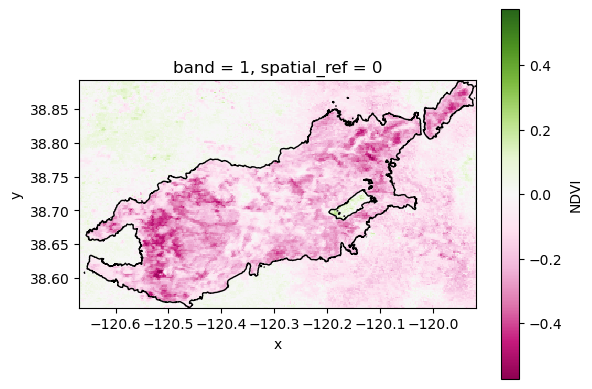

In [57]:
import matplotlib.pyplot as plt


# Calculate the change in NDVI pre- and post- fire
dndvi_da = (ndvi_ds
            .sel(date='2023')
            .mean('date')
            .NDVI
          - ndvi_ds
            .sel(date='2020')
            .mean('date')
            .NDVI
          )
dndvi_da.plot(cmap=plt.colormaps['PiYG'])
caldor_gdf.plot(facecolor='none', ax=plt.gca())

plt.show()

In [59]:
out_gdf = gpd.GeoDataFrame(geometry=caldor_gdf.envelope)
out_gdf = out_gdf.overlay(caldor_gdf, how="difference")  # .plot()
out_gdf

,geometry
0,"MULTIPOLYGON (((-120.66858 38.55684, -120.6685..."


In [60]:
ndvi_fire_ds = ndvi_ds.rio.clip(caldor_gdf.geometry).NDVI
ndvi_out_ds = ndvi_ds.rio.clip(out_gdf.geometry).NDVI

ndvi_fire_df = (ndvi_fire_ds
                .groupby(ndvi_fire_ds.date.dt.year)
                .mean(...)
                .to_dataframe()[['NDVI']])
ndvi_out_df = (ndvi_out_ds
                .groupby(ndvi_out_ds.date.dt.year)
                .mean(...)
                .to_dataframe()[['NDVI']])

(ndvi_fire_df, ndvi_out_df)

(          NDVI
 year          
 2020  0.675613
 2021  0.620678
 2022  0.414605
 2023  0.467663,
           NDVI
 year          
 2020  0.556752
 2021  0.540438
 2022  0.552279
 2023  0.515261)

<Axes: xlabel='year'>

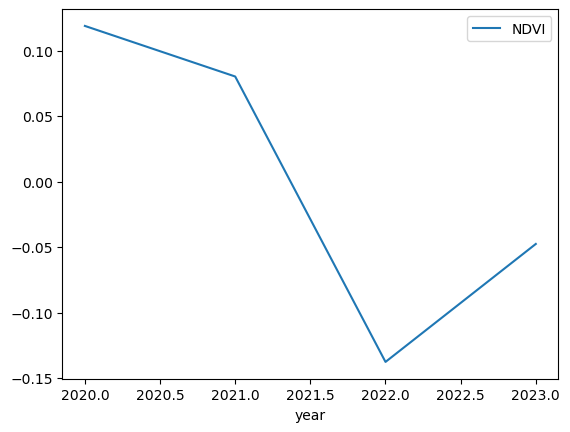

In [61]:
(ndvi_fire_df - ndvi_out_df).plot()

In [62]:
(ndvi_fire_df - ndvi_out_df).hvplot(
    xlabel='Year', ylabel='dNDVI',
    title='Difference in NDVI inside and outside Caldor Fire boundary'
)

:Curve   [year]   (NDVI)

# Data Source

* Fire Boundary at https://services3.arcgis.com/T4QMspbfLg3qTGWY/arcgis/rest/services/WFIGS_Interagency_Perimeters/FeatureServer/0/query?where=poly_IncidentName%20%3D%20%27CALDOR%27&outFields=*&outSR=4326&f=json
* NDVI dataset at https://appeears.earthdatacloud.nasa.gov/task/area (NASA Earthdata account required)

# Citation

* National Interagency Fire Center [The NIFC Org]. (2021). *Wildland Fire Interagency Geospatial Services (WFIGS) Interagency Fire Perimeters.* National Interagency Fire Center ArcGIS Online Organization. Accessed 2023-10-01 from https://data-nifc.opendata.arcgis.com/datasets/nifc::wfigs-interagency-fire-perimeters/api
* Didan, K. (2021). *MODIS/Aqua Vegetation Indices 16-Day L3 Global 250m SIN Grid V061* [250m 16 days NDVI]. NASA EOSDIS Land Processes Distributed Active Archive Center. Accessed 2023-10-01 from https://doi.org/10.5067/MODIS/MYD13Q1.061

In [ ]:
%%capture
%%bash
jupyter nbconvert modis-ndvi-calder-fire.ipynb --to html --no-input